In [1]:
from modecoupling import Modecoupling
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mode = Modecoupling()
ells1 = np.arange(1, 10000, 1)
ells2 = ells1
M = mode.components(ells1, ells2, Nchi=100)

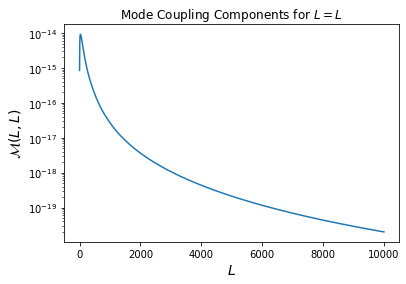

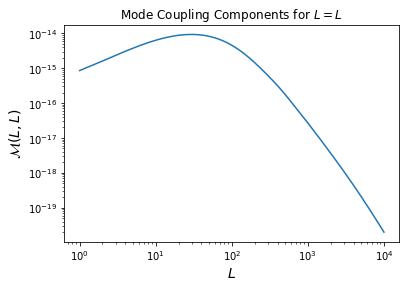

In [4]:
plt.figure()
plt.semilogy(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M)
plt.title("Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}(L,L)$", fontsize=14)

# plt.figure()
# plt.loglog(ells1, 4*M)
# plt.title("$b_{\kappa\kappa\kappa}$ (with $L_1=L_2=L_3=L$)$ = 4\mathcal{M}(L,L)$")
# plt.xlabel("$L$", fontsize=14)
# plt.ylabel("$4\mathcal{M}(L,L)$", fontsize=14)
# plt.xlim(1e2, 1e4)

plt.show()

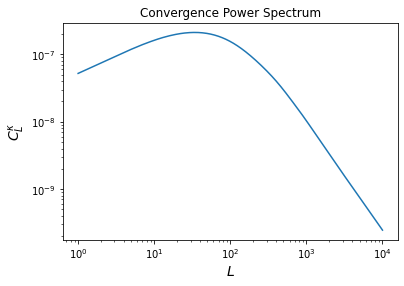

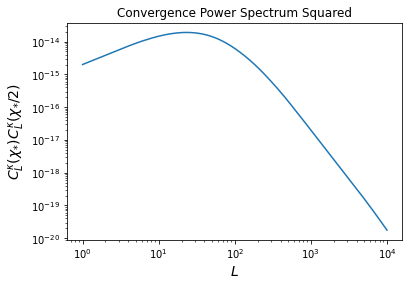

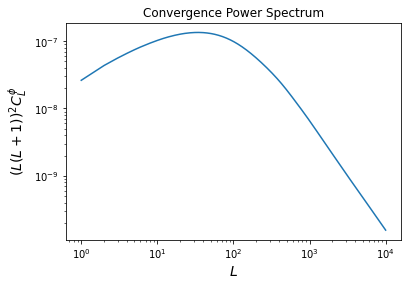

In [4]:
from powerspectra import Powerspectra
from cosmology import Cosmology
power = Powerspectra()
cosmo = Cosmology()
ells = np.arange(1, 10000, 1)
Chi_str = cosmo.get_chi_star()
Cl_kappa1 = power.get_kappa_ps_2source(ells, Chi_str, Chi_str)
Cl_kappa2 = power.get_kappa_ps_2source(ells, Chi_str/2, Chi_str/2)

plt.figure()
plt.loglog(ells, Cl_kappa1, label="2source")
plt.title("Convergence Power Spectrum")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}$", fontsize=14)

plt.figure()
plt.loglog(ells, Cl_kappa1*Cl_kappa2, label="2source")
plt.title("Convergence Power Spectrum Squared")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$C_L^{\kappa}(\chi _{*})C_L^{\kappa}(\chi _{*}/2)$", fontsize=14)

Cl_phi = np.transpose(Cl_kappa1)[0]/(ells+0.5)**4 * 4
plt.figure()
plt.loglog(ells, Cl_phi*(ells*(ells + 1))**2/(2*np.pi), label="2source")
plt.title("Convergence Power Spectrum")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$(L(L+1))^2C_L^{\phi}$", fontsize=14)
plt.show()

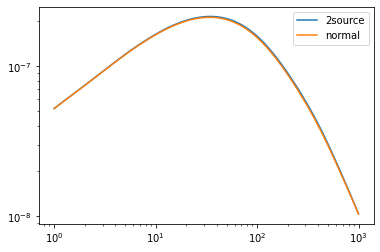

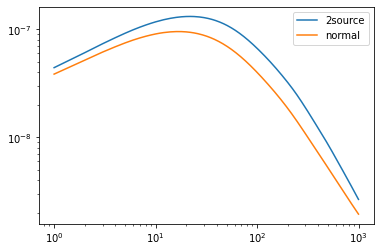

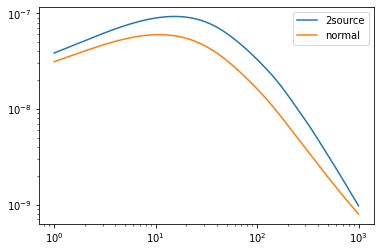

In [5]:
Chis = np.array([Chi_str, Chi_str/2, Chi_str/3])
ells=np.arange(1,1000)
Cl_kappas_2source = power.get_kappa_ps_2source(ells, Chis, Chi_str)

Cl_kappa_Chistr = power.get_kappa_ps(ells)
Cl_kappa_Chistr2 = power.get_kappa_ps(ells, zmax=cosmo.Chi_to_z(Chi_str/2))
Cl_kappa_Chistr3 = power.get_kappa_ps(ells, zmax=cosmo.Chi_to_z(Chi_str/3))

plt.figure()
plt.loglog(ells, Cl_kappas_2source[:,0], label="2source")
plt.loglog(ells, Cl_kappa_Chistr, label="normal")
plt.legend()

plt.figure()
plt.loglog(ells, Cl_kappas_2source[:,1], label="2source")
plt.loglog(ells, Cl_kappa_Chistr2, label="normal")
plt.legend()

plt.figure()
plt.loglog(ells, Cl_kappas_2source[:,2], label="2source")
plt.loglog(ells, Cl_kappa_Chistr3, label="normal")
plt.legend()
plt.show()

In [6]:
from _powerspectra import Powerspectra

power = Powerspectra()
cosmo = Cosmology()
Nchi = 10
zmin = 0
zmax = np.arange(1, 5, 1)
zs, Chis, dChi, window = power.integral_prep(Nchi, zmin, zmax) 

In [7]:
print(f"zs = {zs}")
print(f"Chis = {Chis*2}")
print(f"dChi = {dChi}")
print(f"window = {window}")

zs = [[8.66509189e-002 1.36970827e-001 1.69093156e-001 1.91655486e-001]
 [1.77357320e-001 2.84783273e-001 1.24998608e-321 1.64029794e-321]
 [1.06224114e-321 1.64029794e-321 8.39911598e-322 1.64029794e-321]
 [5.78056806e-322 1.32409593e-321 5.78056806e-322 1.05235983e-321]
 [5.78056806e-322 0.00000000e+000 2.76676762e-322 0.00000000e+000]
 [2.76676762e-322 1.89721208e-321 5.78056806e-322 1.89721208e-321]
 [5.78056806e-322 1.57112875e-321 6.76869935e-322 1.73417042e-321]
 [9.53546696e-322 1.89721208e-321 1.13635099e-321 1.89721208e-321]
 [1.43279037e-321 1.89721208e-321 1.73911107e-321 2.78134232e-308]]
Chis = [[  753.58140134  1176.14259467  1440.01818385  1622.61328264]
 [ 1507.16280268  2352.28518934  2880.0363677   3245.22656529]
 [ 2260.74420402  3528.42778401  4320.05455156  4867.83984793]
 [ 3014.32560536  4704.57037867  5760.07273541  6490.45313058]
 [ 3767.9070067   5880.71297334  7200.09091926  8113.06641322]
 [ 4521.48840804  7056.85556801  8640.10910311  9735.67969587]
 [ 527

In [8]:
print(np.size(zmax))

4


In [9]:
Chi_source1 = np.arange(10000, 50000, 10000)
win1 = cosmo.window(Chis,Chi_source1)
print(win1)

[[0.00255399 0.00165047 0.00135554 0.00120758]
 [0.001227   0.00080024 0.0006611  0.00059129]
 [0.00078466 0.00051682 0.00042962 0.00038586]
 [0.0005635  0.00037512 0.00031388 0.00028314]
 [0.0004308  0.00029009 0.00024444 0.00022152]
 [0.00034233 0.00023341 0.00019815 0.00018043]
 [0.00027914 0.00019292 0.00016508 0.00015108]
 [0.00023175 0.00016256 0.00014028 0.00012907]
 [0.00019489 0.00013894 0.00012099 0.00011195]]


In [10]:
Chi_source2 = 10000
win2 = cosmo.window(Chis, Chi_source2)
print(win2)

[[2.55399331e-03 1.60047408e-03 1.28887135e-03 1.13257958e-03]
 [1.22699666e-03 7.50237041e-04 5.94435675e-04 5.16289790e-04]
 [7.84664438e-04 4.66824694e-04 3.62957117e-04 3.10859860e-04]
 [5.63498328e-04 3.25118521e-04 2.47217838e-04 2.08144895e-04]
 [4.30798663e-04 2.40094817e-04 1.77774270e-04 1.46515916e-04]
 [3.42332219e-04 1.83412347e-04 1.31478558e-04 1.05429930e-04]
 [2.79141902e-04 1.42924869e-04 9.84101930e-05 7.60827973e-05]
 [2.31749164e-04 1.12559260e-04 7.36089188e-05 5.40724476e-05]
 [1.94888146e-04 8.89415648e-05 5.43190390e-05 3.69532868e-05]]


In [11]:
ells = np.array([1,2])
ks = ells[0] / Chis
print(ks)

[[0.00265399 0.00170047 0.00138887 0.00123258]
 [0.001327   0.00085024 0.00069444 0.00061629]
 [0.00088466 0.00056682 0.00046296 0.00041086]
 [0.0006635  0.00042512 0.00034722 0.00030814]
 [0.0005308  0.00034009 0.00027777 0.00024652]
 [0.00044233 0.00028341 0.00023148 0.00020543]
 [0.00037914 0.00024292 0.00019841 0.00017608]
 [0.00033175 0.00021256 0.00017361 0.00015407]
 [0.00029489 0.00018894 0.00015432 0.00013695]]


In [12]:
weyl_ps = cosmo.get_weyl_ps(cosmo.get_weyl_PK(), zs, ks, curly=False, scaled=False)
print(weyl_ps)
print(weyl_ps/Chis**2)

[[4.91120315e-01 2.11847671e+00 4.09133383e+00 6.02608785e+00]
 [4.74339075e+00 2.00681511e+01 3.07181855e+01 4.43237472e+01]
 [1.45685800e+01 5.72898623e+01 1.06473094e+02 1.53370933e+02]
 [3.53361165e+01 1.38185969e+02 2.56416154e+02 3.69083743e+02]
 [7.00588833e+01 2.73160304e+02 5.06435101e+02 7.28662173e+02]
 [1.22395747e+02 4.76344385e+02 8.82665275e+02 1.26967254e+03]
 [1.96031884e+02 7.61977922e+02 1.41145123e+03 2.02998394e+03]
 [2.94674295e+02 1.14439515e+03 2.11931351e+03 3.04772214e+03]
 [4.22049351e+02 1.63801226e+03 3.03292751e+03 4.36123112e+03]]
[[3.45929459e-06 6.12581291e-06 7.89203415e-06 9.15514857e-06]
 [8.35273224e-06 1.45073272e-05 1.48135656e-05 1.68347401e-05]
 [1.14018248e-05 1.84066733e-05 2.28203028e-05 2.58899069e-05]
 [1.55560197e-05 2.49737638e-05 3.09135896e-05 3.50457107e-05]
 [1.97388956e-05 3.15949456e-05 3.90757956e-05 4.42808709e-05]
 [2.39476815e-05 3.82611997e-05 4.72952559e-05 5.35820301e-05]
 [2.81793053e-05 4.49662160e-05 5.55640426e-05 6.29399

In [13]:
I = weyl_ps/Chis**2 * dChi * win1 * win2
print(I)

[[8.50212009e-09 9.51592622e-09 9.92769003e-09 1.01586247e-08]
 [4.73822297e-09 5.12194065e-09 4.19151620e-09 4.16951331e-09]
 [2.64510234e-09 2.61157417e-09 2.56214094e-09 2.51947335e-09]
 [1.86116091e-09 1.79111801e-09 1.72717800e-09 1.67569280e-09]
 [1.38029438e-09 1.29410748e-09 1.22261200e-09 1.16597953e-09]
 [1.05744844e-09 9.63254310e-10 8.87143970e-10 8.26945132e-10]
 [8.27333336e-10 7.29142381e-10 6.49917301e-10 5.86966045e-10]
 [6.56294034e-10 5.56363971e-10 4.74886455e-10 4.09656584e-10]
 [5.25229234e-10 4.24951237e-10 3.41763099e-10 2.74554757e-10]]


In [14]:
Cl_kappa_ell = I.sum(axis=0) * (ells[0] + 0.5)** 4

In [15]:
print(Cl_kappa_ell)

[1.12353104e-07 1.16479916e-07 1.11298293e-07 1.10298744e-07]


In [16]:
##################################
ells = np.array([1,2])
Cl_kappa = np.zeros((np.size(ells), np.size(Chi_source1)))
print(Cl_kappa[0])
print(np.shape(Cl_kappa_ell))
for iii, ell in enumerate(ells):
    ks = ell / Chis
    weyl_ps = cosmo.get_weyl_ps(cosmo.get_weyl_PK(), zs, ks, curly=False, scaled=False)
    I = weyl_ps/Chis**2 * dChi * win1 * win2
    thing = I.sum(axis=0) * (ell + 0.5)** 4
    print(thing)
    Cl_kappa[iii] = thing
print(Cl_kappa)

[0. 0. 0. 0.]
(4,)
[1.12353104e-07 1.16479916e-07 1.11298293e-07 1.10298744e-07]
[9.40068347e-08 1.01691109e-07 9.84801412e-08 9.82884761e-08]
[[1.12353104e-07 1.16479916e-07 1.11298293e-07 1.10298744e-07]
 [9.40068347e-08 1.01691109e-07 9.84801412e-08 9.82884761e-08]]
